# **House Prices Prediction in Iowa State**

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from termcolor import colored
import matplotlib.pyplot as plt
import warnings

# Disable Matplotlib warnings
warnings.filterwarnings("ignore", category=UserWarning)

## Data Understanding

Retrieving data from the dataset

In [3]:
data_path = './data'
raw_train = pd.read_csv(data_path + '/train.csv')
raw_test = pd.read_csv(data_path + '/test.csv')

In [4]:
numerical_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
raw_numerical_train = raw_train.select_dtypes(include=numerical_types)

print(colored( 
    f'Dataset has {len(raw_train.columns)} features, '
    f'with {len(raw_numerical_train.columns)} numerical columns'
    f'\n',
    color='green', attrs=['bold', 'blink']))

print(colored('All columns:', color='green', attrs=['blink']))
print(raw_train.columns.values)

print(colored('\nNumerical columns:', color='green', attrs=['blink']))
print(raw_numerical_train.columns.values)

Dataset has 81 features, with 38 numerical columns

All columns:
['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'P

In [45]:
display(raw_numerical_train.iloc[:, 0 :19].describe().style.format('{:.2f}'))
display(raw_numerical_train.iloc[:, 19:38].describe().style.format('{:.2f}'))

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath
count,1460.00,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06
std,421.61,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00
25%,365.75,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00
50%,730.50,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00
75%,1095.25,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00
max,1460.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00


,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


In [51]:

print(f'{raw_train.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC


There are 19 columns with missing values:
['LotFrontage' 'Alley' 'MasVnrType' 'MasVnrArea' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Electrical' 'FireplaceQu'
 'GarageType' 'GarageYrBlt' 'GarageFinish' 'GarageQual' 'GarageCond'
 'PoolQC' 'Fence' 'MiscFeature']


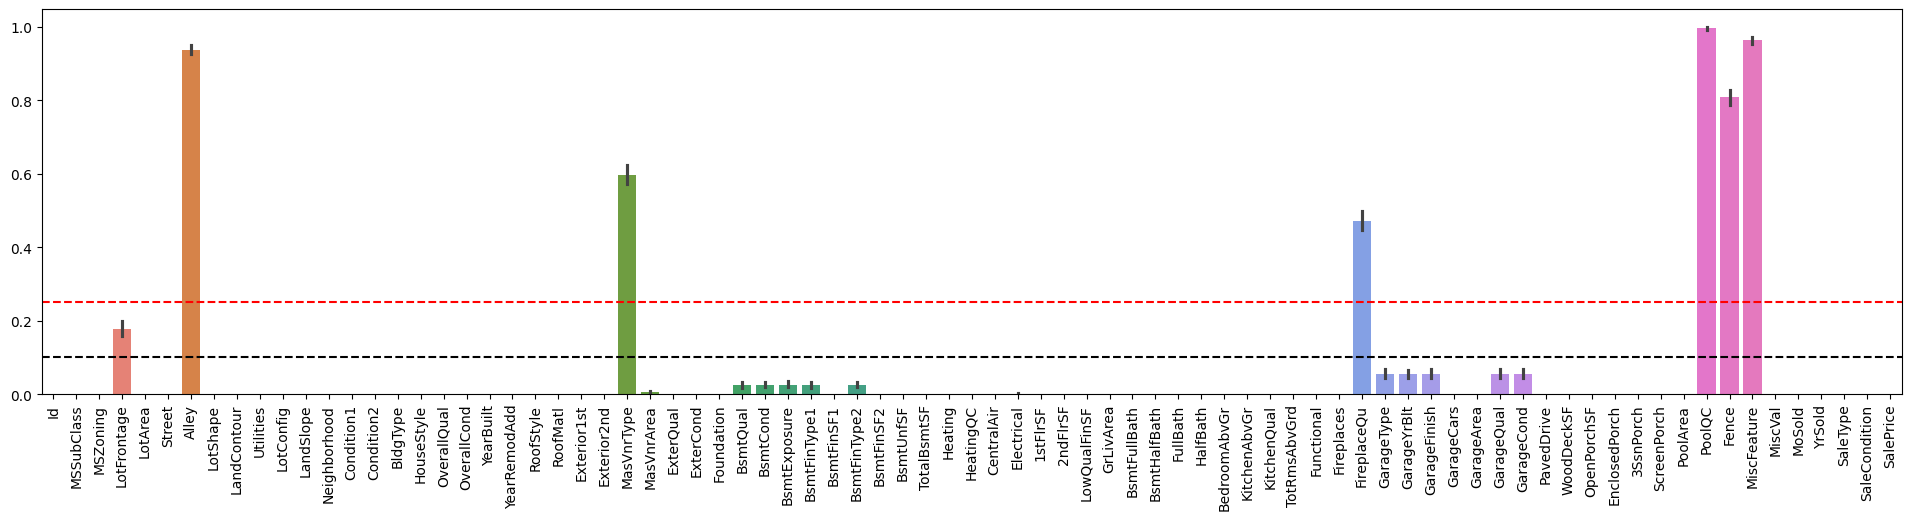

In [20]:
# print the name of every column with at least one missing value
_ = raw_train.columns[raw_train.isna().any()]
print(colored(f'\nThere are {len(_)} columns with missing values:', color='red', attrs=['bold', 'blink']))
print(_.values)

_, ax = plt.subplots(figsize=(24, 5))
sns.barplot(data=raw_train.isna(), ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
ax.axhline(0.25, ls='--', c='r')
ax.axhline(0.1, ls='--', c='k')

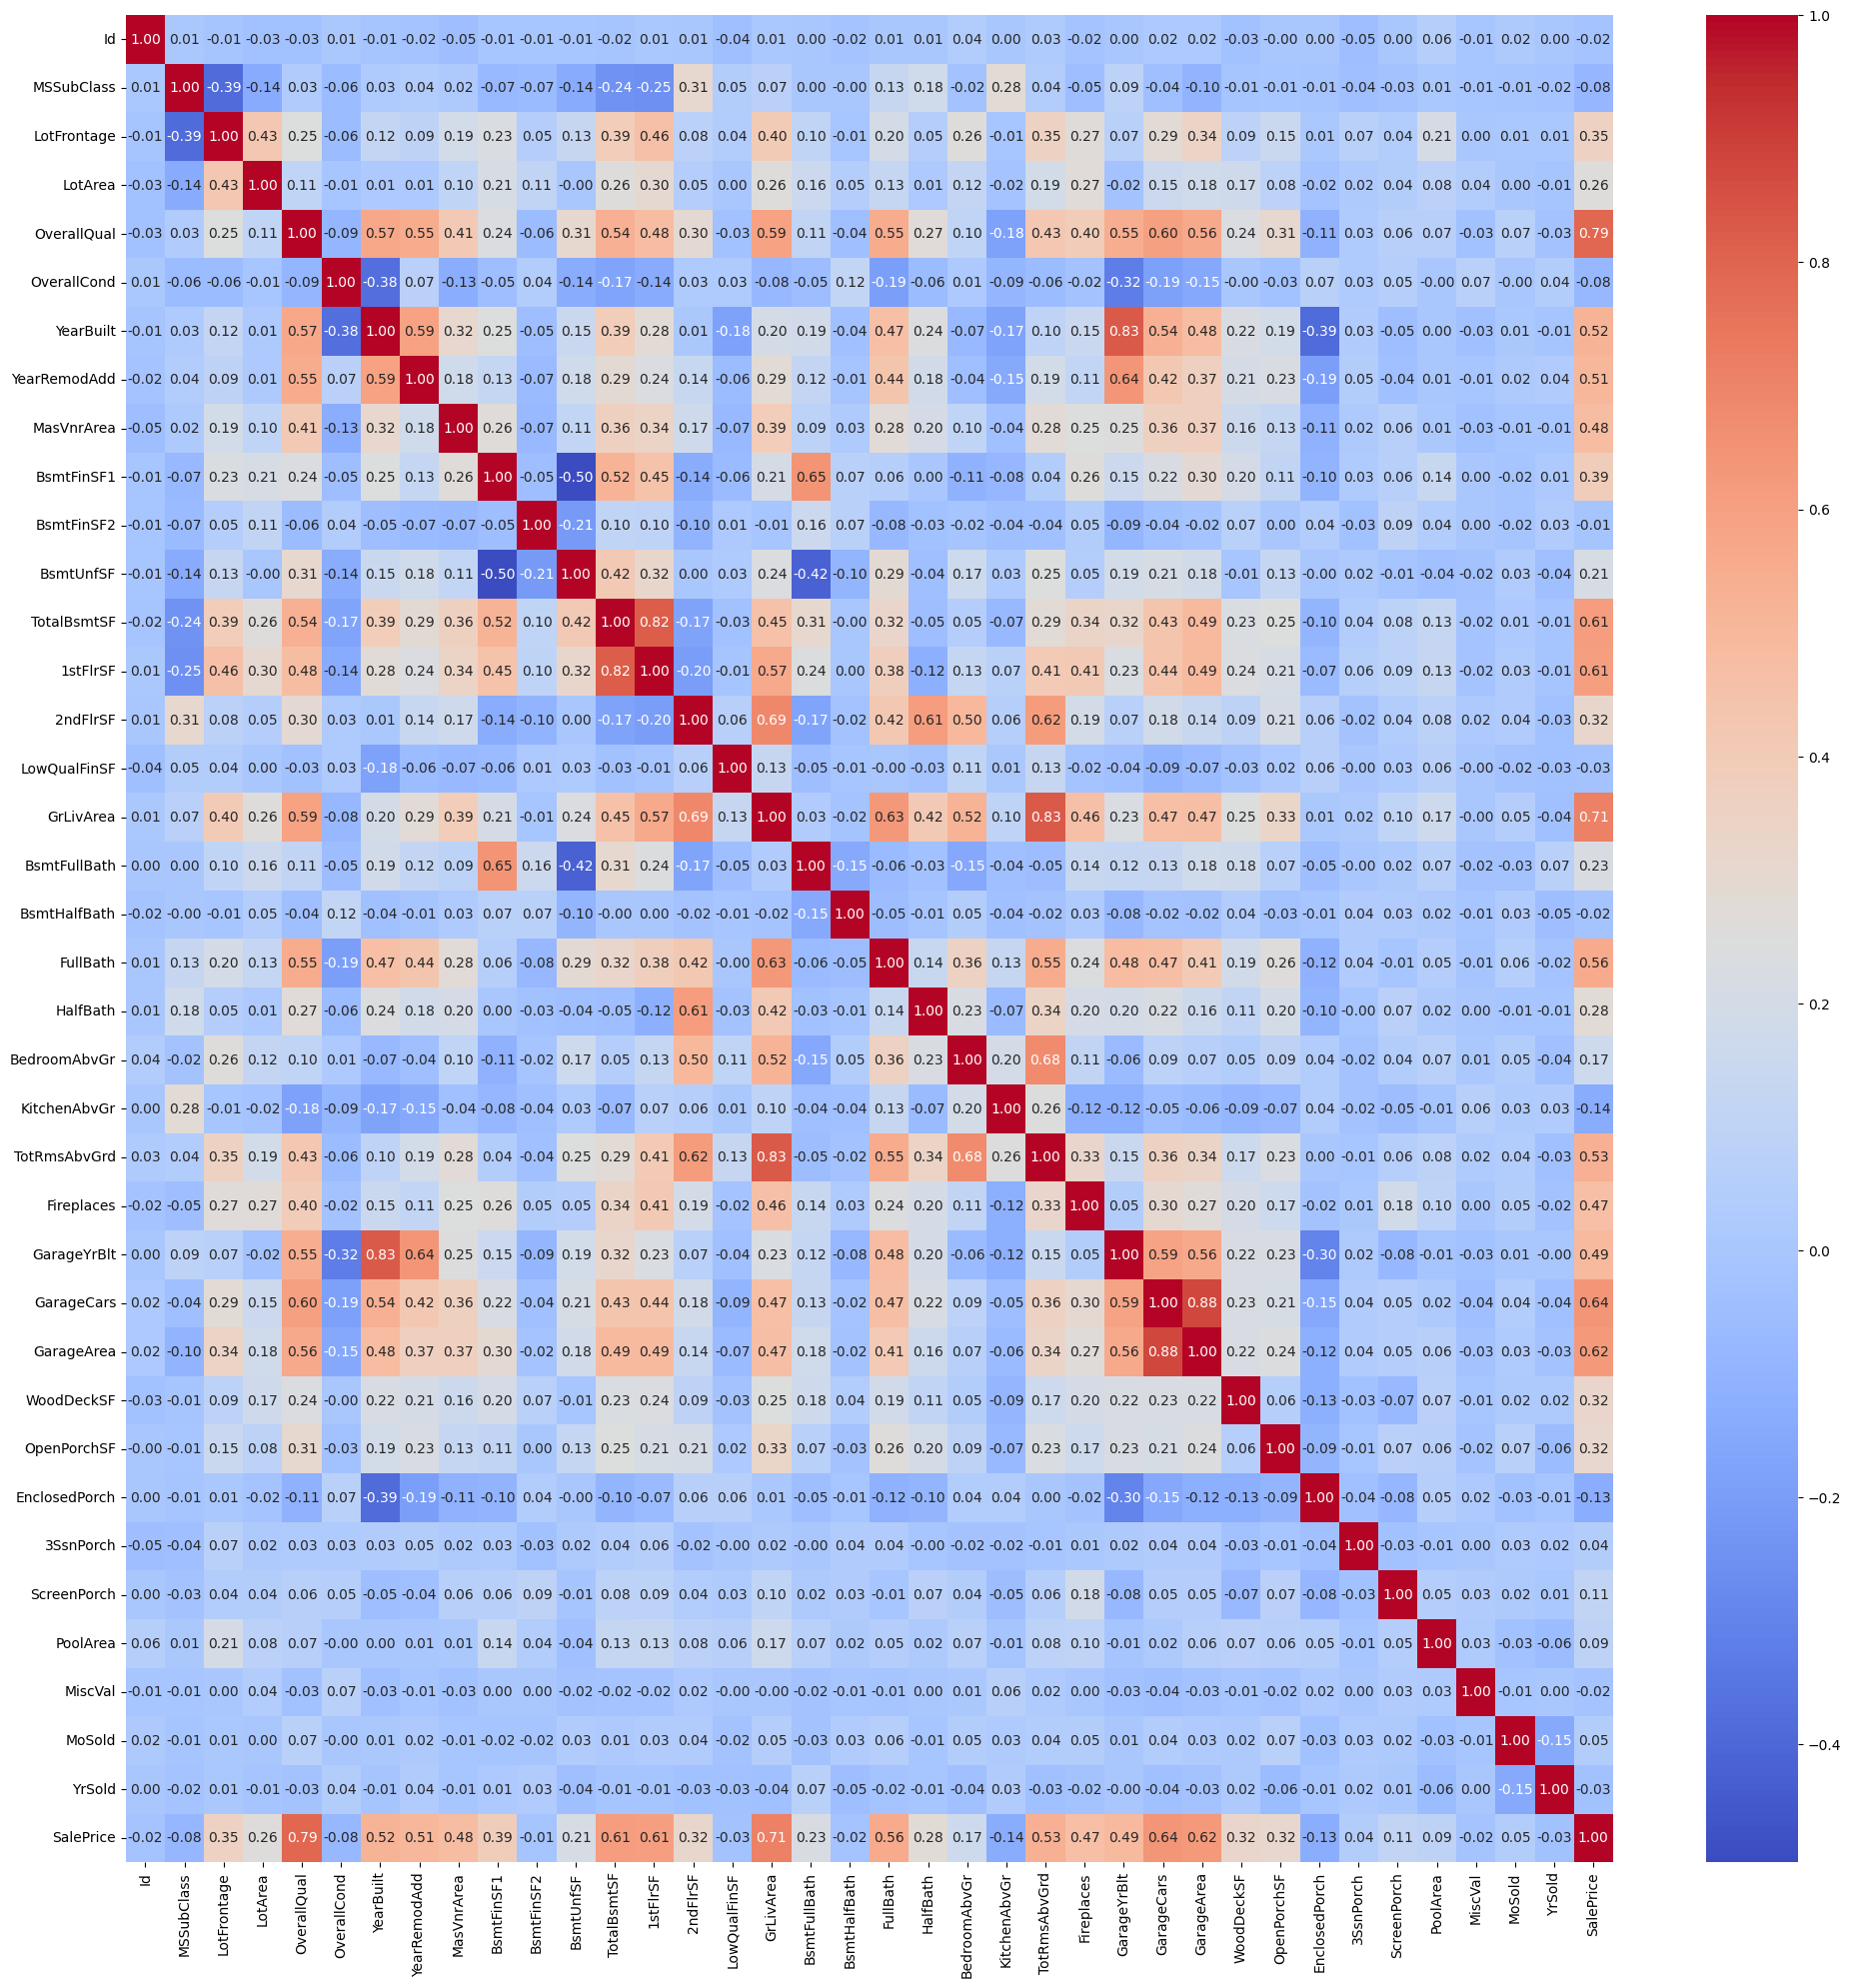

In [21]:
corr = raw_numerical_train.corr()
_, ax = plt.subplots(figsize=(24, 24))
sns.heatmap(corr, annot=True, fmt='.2f', ax=ax, cmap='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')
plt.show()

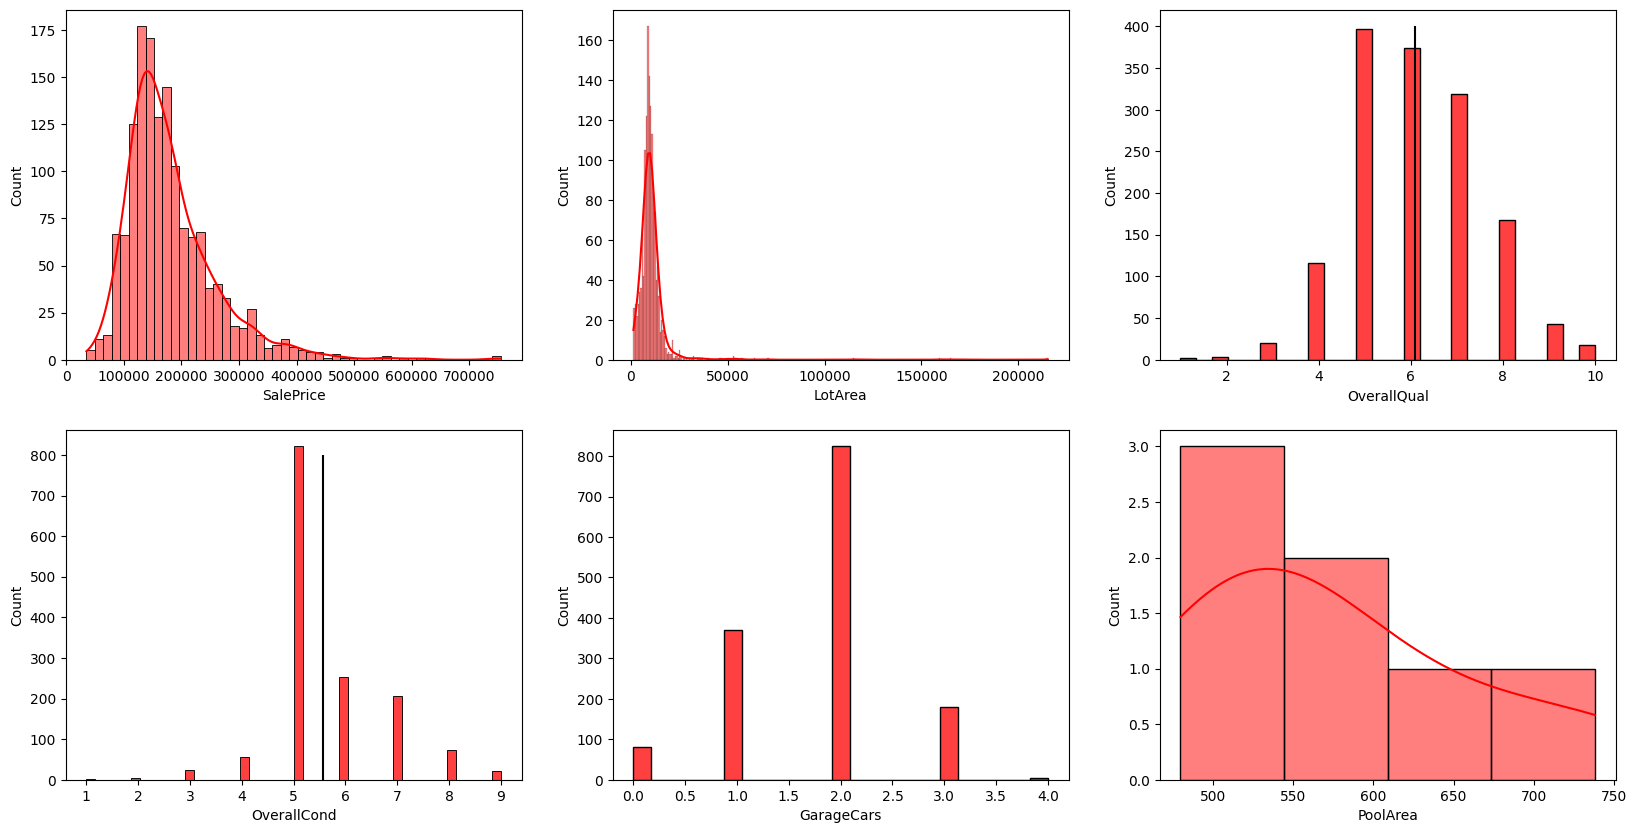

In [28]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
sns.histplot(raw_train['SalePrice'], color='red', kde=True, ax=ax[0][0])
sns.histplot(raw_train['LotArea'], color='red', kde=True, ax=ax[0][1])
sns.histplot(raw_train['OverallQual'], color='red', ax=ax[0][2])
sns.histplot(raw_train['OverallCond'], color='red', ax=ax[1][0])
sns.histplot(raw_train['GarageCars'], color='red', ax=ax[1][1])
sns.histplot(raw_train[raw_train['PoolArea'] > 10]['PoolArea'], kde=True, color='red', ax=ax[1][2])
ax[0][2].vlines(raw_train['OverallQual'].mean(), ymin=0, ymax=400, color="k", clip_on=False)
ax[1][0].vlines(raw_train['OverallCond'].mean(), ymin=0, ymax=800, color="k", clip_on=False)


In [23]:
raw_categorical_train = raw_train.select_dtypes(exclude=numerical_types)
print(colored(f'\nThere are {len(raw_categorical_train.columns)} categorical columns:', color='green', attrs=['blink']))
print(raw_categorical_train.columns.values)


There are 43 categorical columns:
['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition']


## Data Processing

## Modelling

## Evaluation

## Submission